#  Metadata

```yaml
Course:   DS 5001 
Module:   12 Lab
Topic:    Save Novels with Emotions 
Author:   R.C. Alvarado
Date:     12 April 2023
```

**Purpose:** Collect all the novel collections we have and combine each novel with the combined sentiment lexicon table we created last time.

# Set Up

## Config

In [1]:
data_path = '../data'
out_dir = f"{data_path}/syuzhet"

In [2]:
config = {
    'novels': {
        'OHCO': 'book_id chap_id para_num sent_num token_num'.split(),
        'LIB': 'LIB',
        'TOKENS': 'CORPUS',
        'data_dir': f"{data_path}/novels"
    },
    'austen-melville': {
        'OHCO': 'book_id chap_num para_num sent_num token_num'.split(),
        'LIB': 'LIB',
        'TOKENS': 'TOKEN2',
        'data_dir': f"{data_path}/output"
    }
}

In [3]:
token_cols = ['pos','term_str']
salex_csv = f'{data_path}/lexicons/salex_combo.csv'

## Import

In [4]:
import pandas as pd

# Prepare Data

## Get Lexicons

We created this last week.

In [5]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX['nrc_polarity'] = SALEX.nrc_positive - SALEX.nrc_negative

In [6]:
SALEX.columns.tolist()

['nrc_anger',
 'nrc_anticipation',
 'nrc_disgust',
 'nrc_fear',
 'nrc_joy',
 'nrc_negative',
 'nrc_positive',
 'nrc_sadness',
 'nrc_surprise',
 'nrc_trust',
 'nrc_sentiment',
 'bing_negative',
 'bing_positive',
 'bing_sentiment',
 'syu_sentiment',
 'gi_sentiment',
 'nrc_polarity']

## Get Texts

We import two sets of pre-processed novels and combine them.

In [7]:
TOKENS = {} # Dict of dataframes
LIB = {} # Dict of dataframes
for prefix in config:
    print(prefix)
    
    token_file = f"{config[prefix]['data_dir']}/{prefix}-{config[prefix]['TOKENS']}.csv"
    TOKENS[prefix] = pd.read_csv(token_file).set_index(config[prefix]['OHCO'])[token_cols]    
    
    lib_file = f"{config[prefix]['data_dir']}/{prefix}-{config[prefix]['LIB']}.csv"
    LIB[prefix] = pd.read_csv(lib_file)

novels
austen-melville


## Standardize `TOKENS` tables

We make the OHCO columns names the same (since one has `chap_num` and the other `chap_id`).

In [8]:
TOKENS['novels'].index.names = config['austen-melville']['OHCO']

In [9]:
TOKENS['novels']

pos     term_str
book_id         chap_num para_num sent_num token_num                  
secretadversary 1        0        1        0           DT          the
                                           1          NNP        young
                                           2          NNP  adventurers
                                           3          NNP          ltd
                         1        0        0           JJ        tommy
...                                                   ...          ...
baskervilles    11       114      1        7          RBR         more
                                           8           JJ  comfortable
                                           9           IN      outside
                                           10          IN         than
                                           11          NN           in

[1500417 rows x 2 columns]

## Standardize `LIB` tables

In [10]:
LIB['austen-melville']['author_id']  = LIB['austen-melville'].author.str.split(', ').str[0].str.lower()

In [11]:
LIB['novels']['title'] = LIB['novels']['book_id']
LIB['novels'] = LIB['novels'].set_index('book_id')

In [12]:
LIB['novels'] = LIB['novels'][['author_id', 'title']]
LIB['novels']['corpus'] = 'novels' 

In [13]:
LIB['novels']

,author_id,title,corpus
book_id,,,
secretadversary,christie,secretadversary,novels
styles,christie,styles,novels
moonstone,collins,moonstone,novels
adventures,doyle,adventures,novels
baskervilles,doyle,baskervilles,novels
scarlet,doyle,scarlet,novels
signoffour,doyle,signoffour,novels
marieroget,poe,marieroget,novels
ruemorgue,poe,ruemorgue,novels


In [14]:
LIB['austen-melville'] = LIB['austen-melville'].set_index('book_id')
LIB['austen-melville'] = LIB['austen-melville'][['author_id', 'title']]
LIB['austen-melville']['corpus'] = 'austen-melville'

In [15]:
LIB['austen-melville']

,author_id,title,corpus
book_id,,,
105,austen,PERSUASION,austen-melville
121,austen,NORTHANGER ABBEY,austen-melville
141,austen,MANSFIELD PARK,austen-melville
158,austen,EMMA,austen-melville
161,austen,SENSE AND SENSIBILITY,austen-melville
946,austen,LADY SUSAN,austen-melville
1212,austen,LOVE AND FREINDSHIP SIC,austen-melville
1342,austen,PRIDE AND PREJUDICE,austen-melville
1900,melville,TYPEE A ROMANCE OF THE SOUTH SEAS,austen-melville


## Combine LIBs

In [16]:
LIB_ALL = pd.concat(LIB.values())

In [17]:
# LIB_ALL = pd.concat([LIB[prefix] for prefix in config])

In [18]:
LIB_ALL.sample(10)

,author_id,title,corpus
book_id,,,
signoffour,doyle,signoffour,novels
moonstone,collins,moonstone,novels
34970,melville,PIERRE OR THE AMBIGUITIES,austen-melville
secretadversary,christie,secretadversary,novels
udolpho,radcliffe,udolpho,novels
christmascarole,dickens,christmascarole,novels
monk,lewis,monk,novels
141,austen,MANSFIELD PARK,austen-melville
pitandpendulum,poe,pitandpendulum,novels


## Combine TOKENS

In [19]:
TOKENS_ALL = pd.concat(TOKENS.values())

In [20]:
# TOKENS_ALL = pd.concat([TOKENS[prefix] for prefix in config])

In [21]:
TOKENS_ALL

pos     term_str
book_id         chap_num para_num sent_num token_num                  
secretadversary 1        0        1        0           DT          the
                                           1          NNP        young
                                           2          NNP  adventurers
                                           3          NNP          ltd
                         1        0        0           JJ        tommy
...                                                   ...          ...
10712           92       23       0        7           DT            a
                                           8           NN       voyage
                                           9           NN        thats
                                           10         SYM     homeward
                                           12          NN        bound

[3570672 rows x 2 columns]

# Compute Sentiments

> Syuzhet computes the sentiment of a sentence by summing the sentiment scores of all the words in the sentence and then dividing by the total number of words in the sentence.

In [60]:
def get_sentiments(bag:int = 3):
    BAG = TOKENS_ALL.index.names[:bag] # Paragraphs = 3
    AGGS = ['sum']
    DOCS = TOKENS_ALL.join(SALEX, on='term_str').groupby(BAG).agg(
        {
            'term_str': ['count'],
            'nrc_sentiment': AGGS,
            'bing_sentiment': AGGS,
            'syu_sentiment': AGGS,
            'gi_sentiment': AGGS
        }
    )
    DOCS = (DOCS.iloc[:,1:].T / DOCS.term_str['count']).T
    DOCS.columns = DOCS.columns.droplevel(1)

    return DOCS

In [61]:
SENTS = get_sentiments(4)
PARAS = get_sentiments(3)
CHAPS = get_sentiments(2)

In [62]:
SENTS

nrc_sentiment  bing_sentiment  \
book_id chap_num para_num sent_num                                  
105     1        1        0              0.000000       -0.049020   
                          1              0.000000        0.000000   
                 2        0              0.000000        0.000000   
                 3        0              0.062500        0.000000   
                          1              0.000000       -0.051282   
...                                           ...             ...   
usher   1        47       0             -0.100000       -0.100000   
                          1             -0.058824       -0.058824   
                          2             -0.060606       -0.060606   
                          3              0.023256        0.023256   
                          4             -0.013699       -0.013699   

                                    syu_sentiment  gi_sentiment  
book_id chap_num para_num sent_num                               
105     1        1        0             -0.020098      0.019608  
                          1              0.000000      0.000000  
                 2        0              0.000000      0.000000  
                 3        0              0.037500      0.000000  
                          1             -0.012821      0.000000  
...                                           ...           ...  
usher   1        47       0             -0.180000     -0.200000  
                          1             -0.008824     -0.117647  
                          2             -0.056061      0.000000  
                          3              0.019767      0.023256  
                          4             -0.015753      0.013699  

[181987 rows x 4 columns]

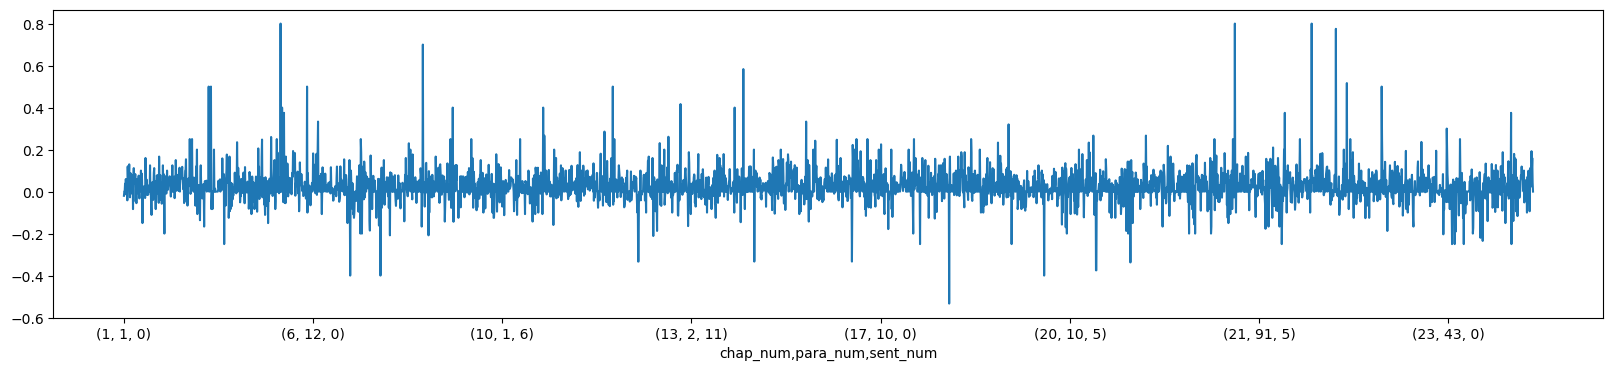

In [49]:
SENTS.loc[105].syu_sentiment.plot(figsize=(20,4));

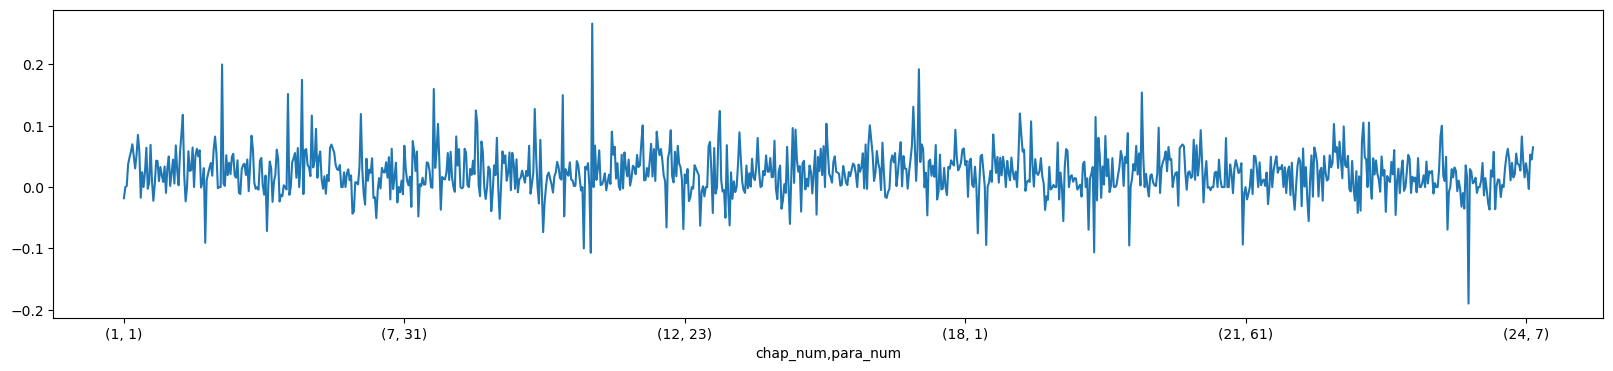

In [63]:
PARAS.loc[105].syu_sentiment.plot(figsize=(20,4));

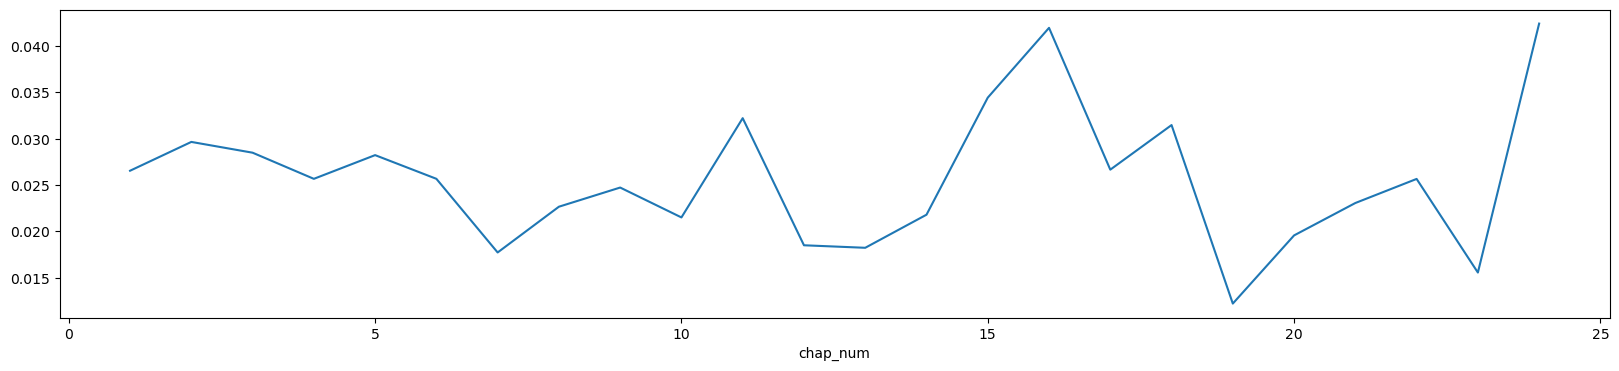

In [64]:
CHAPS.loc[105].syu_sentiment.plot(figsize=(20,4));

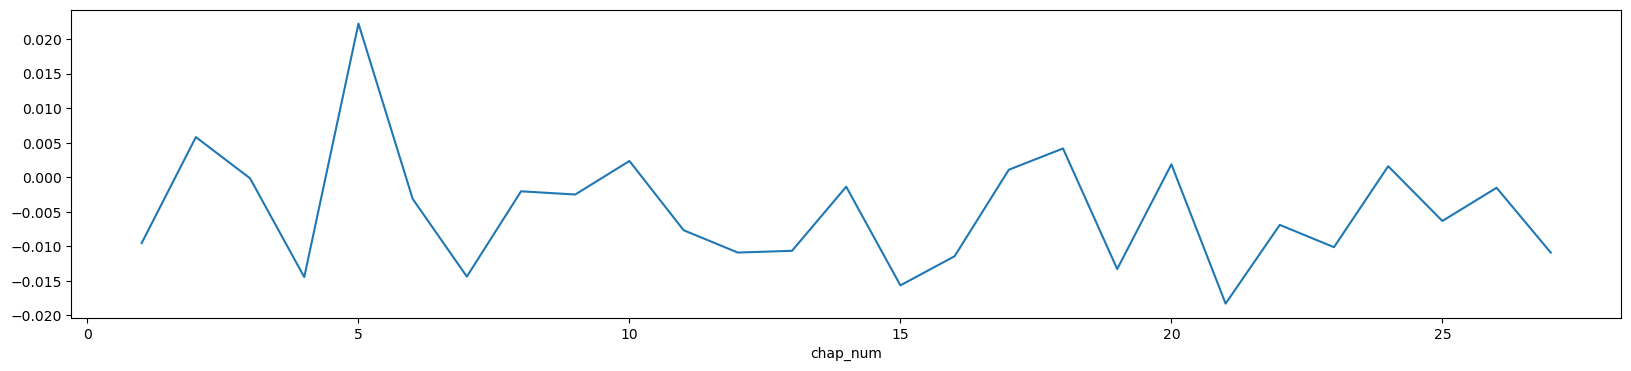

In [65]:
CHAPS.loc['dracula'].bing_sentiment.plot(figsize=(20,4));

# Save

In [52]:
SENTS.to_pickle(f"{out_dir}/M_SENTS.pickle")
CHAPS.to_pickle(f"{out_dir}/M_CHAPS.pickle")
PARAS.to_pickle(f"{out_dir}/M_PARAS.pickle")

In [53]:
LIB_ALL.to_csv(f"{out_dir}/combo-LIB.csv")

In [54]:
TOKENS_ALL.to_csv(f"{out_dir}/combo-TOKENS.csv")

Save as sentences for R package.

In [32]:
TOKENS_ALL['term_str_padded'] = TOKENS_ALL.term_str + " "
SENTENCES = TOKENS_ALL.groupby(['book_id','chap_num','para_num','sent_num']).term_str_padded.sum().to_frame('sent_str')
SENTENCES.to_csv(f"{out_dir}/combo-SENTENCES.csv")